In [2]:
import numpy as np
import pandas as pd
import json
from pathlib import Path
from einops import rearrange

def load_ts_data(root_path, folder_id):
    root_path = Path(root_path) 
    ts_path = root_path / f'data/{folder_id}'
    ts_series = [np.load(p) for p in ts_path.glob('*.npy')]
    ts_series = np.stack(ts_series, axis=0)
    return ts_series

In [3]:
root_path = 'dataset/BjTT'
tmp = []
for folder_id in range(1, 4):
    ds = load_ts_data(root_path, folder_id)
    tmp.append(ds)
ds = np.concatenate(tmp, axis=0)

In [4]:
ds = rearrange(ds, "t h w c -> t (w h) c")
ds = ds[:, :-233, 1]

In [5]:
df = pd.DataFrame(ds, index=pd.date_range(start='2022-01-01', end='2022-4-1', freq='4min', inclusive='left'))
df.index.name = 'date'
df.rename(columns={df.columns[-1]: 'OT'}, inplace=True)
df.to_csv('dataset/BjTT/bjtt.csv')
display(df)

,0,1,2,3,4,5,6,7,8,9,...,1053,1054,1055,1056,1057,1058,1059,1060,1061,OT
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,54.0,40.0,44.0,27.0,52.0,67.0,72.0,74.0,70.0,64.0,...,42.0,33.0,38.0,34.0,32.0,70.0,77.0,77.0,70.0,72.0
2022-01-01 00:04:00,51.0,38.0,40.0,39.0,41.0,67.0,67.0,68.0,69.0,66.0,...,34.0,41.0,37.0,35.0,27.0,72.0,72.0,72.0,70.0,75.0
2022-01-01 00:08:00,50.0,40.0,45.0,27.0,46.0,49.0,57.0,61.0,59.0,64.0,...,46.0,35.0,29.0,34.0,31.0,70.0,69.0,70.0,60.0,63.0
2022-01-01 00:12:00,57.0,50.0,48.0,27.0,48.0,75.0,69.0,68.0,74.0,72.0,...,47.0,27.0,30.0,36.0,45.0,75.0,78.0,76.0,69.0,66.0
2022-01-01 00:16:00,48.0,38.0,45.0,27.0,48.0,62.0,64.0,65.0,65.0,64.0,...,42.0,41.0,27.0,29.0,27.0,67.0,69.0,71.0,63.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 23:40:00,49.0,41.0,47.0,27.0,47.0,72.0,72.0,72.0,68.0,69.0,...,48.0,40.0,36.0,39.0,29.0,76.0,76.0,76.0,71.0,76.0
2022-03-31 23:44:00,49.0,38.0,47.0,27.0,47.0,63.0,65.0,67.0,69.0,67.0,...,51.0,51.0,33.0,31.0,28.0,71.0,71.0,72.0,69.0,73.0
2022-03-31 23:48:00,57.0,42.0,40.0,30.0,43.0,66.0,66.0,66.0,64.0,64.0,...,49.0,47.0,27.0,27.0,34.0,74.0,72.0,72.0,70.0,72.0


<Axes: xlabel='date'>

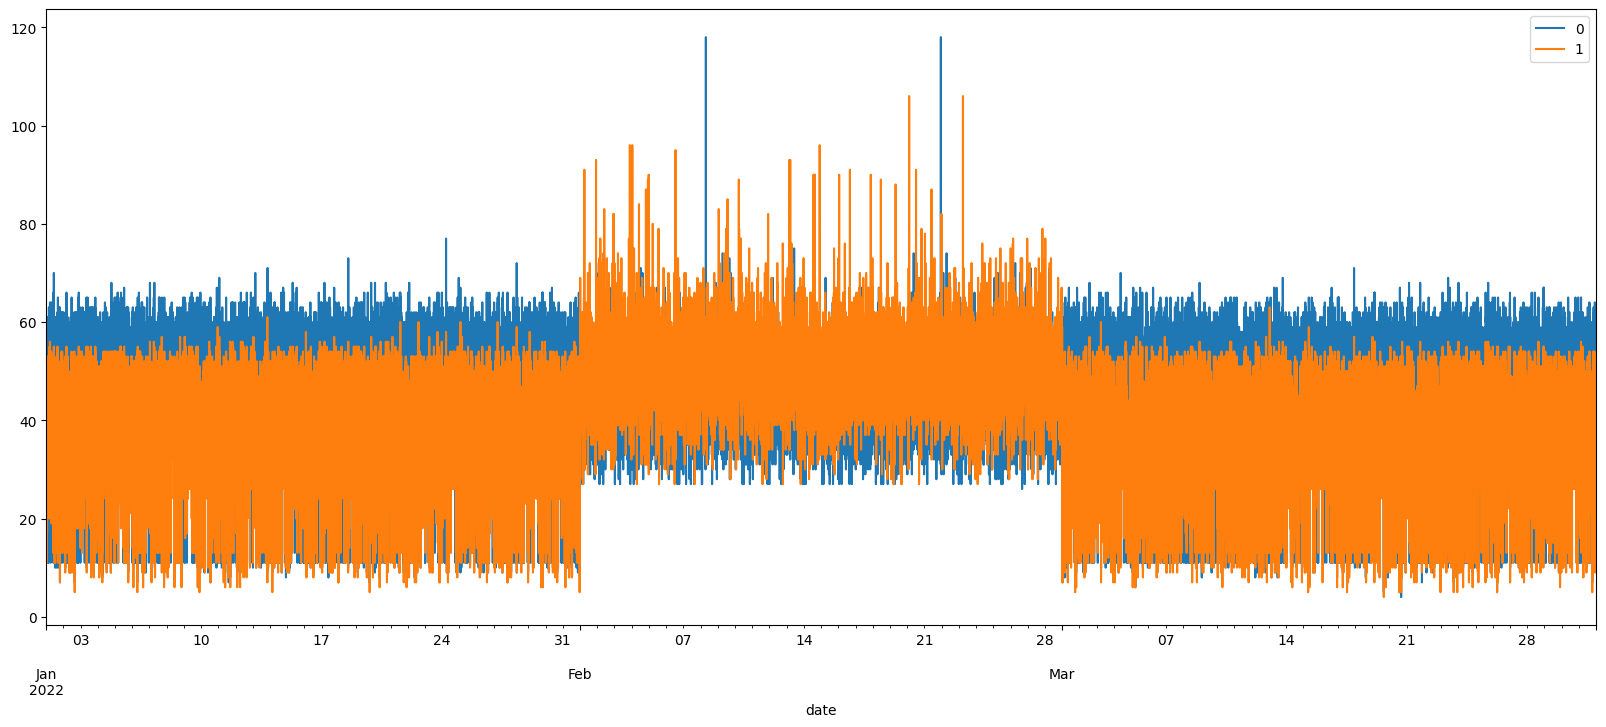

In [56]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 8)  # 设置图形大小为宽度12英寸，高度8英寸
df.iloc[:, :2].plot()

In [47]:
import numpy as np

def calculate_entropy(vector):
    vector -= vector.min()
    # Step 1: Normalize the vector to get a probability distribution
    probabilities = vector / np.sum(vector)
    
    # Avoid log2(0) issues by filtering out zero probabilities
    probabilities = probabilities[probabilities != 0]
    
    # Step 2: Calculate the entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy

# Example usage:
vector = df.values[:, :]
entropy = calculate_entropy(vector)
print("Entropy:", entropy)

Entropy: 24.959706985511943


In [51]:
df_ett = pd.read_csv('dataset/traffic/traffic.csv', index_col='date')
df_ett.head()

,0,1,2,3,4,5,6,7,8,9,...,852,853,854,855,856,857,858,859,860,OT
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01 02:00:00,0.0048,0.0146,0.0289,0.0142,0.0064,0.0232,0.0162,0.0242,0.0341,0.0375,...,0.0051,0.0051,0.0074,0.0079,0.0051,0.0051,0.0339,0.0051,0.0100,0.0121
2016-07-01 03:00:00,0.0072,0.0148,0.0350,0.0174,0.0084,0.0240,0.0201,0.0338,0.0434,0.0381,...,0.0036,0.0036,0.0107,0.0058,0.0036,0.0036,0.0348,0.0036,0.0087,0.0136
2016-07-01 04:00:00,0.0040,0.0101,0.0267,0.0124,0.0049,0.0170,0.0127,0.0255,0.0332,0.0309,...,0.0030,0.0030,0.0043,0.0050,0.0030,0.0030,0.0327,0.0030,0.0061,0.0107
2016-07-01 05:00:00,0.0039,0.0060,0.0218,0.0090,0.0029,0.0118,0.0088,0.0163,0.0211,0.0199,...,0.0033,0.0033,0.0019,0.0052,0.0033,0.0033,0.0292,0.0033,0.0040,0.0071
2016-07-01 06:00:00,0.0042,0.0055,0.0191,0.0082,0.0024,0.0095,0.0064,0.0087,0.0144,0.0226,...,0.0049,0.0049,0.0011,0.0071,0.0049,0.0049,0.0264,0.0049,0.0040,0.0039


In [52]:
# Example usage:
vector = df_ett.values[:,:]
entropy = calculate_entropy(vector)
print("Entropy:", entropy)

Entropy: 23.330102987351854


<Axes: xlabel='date'>

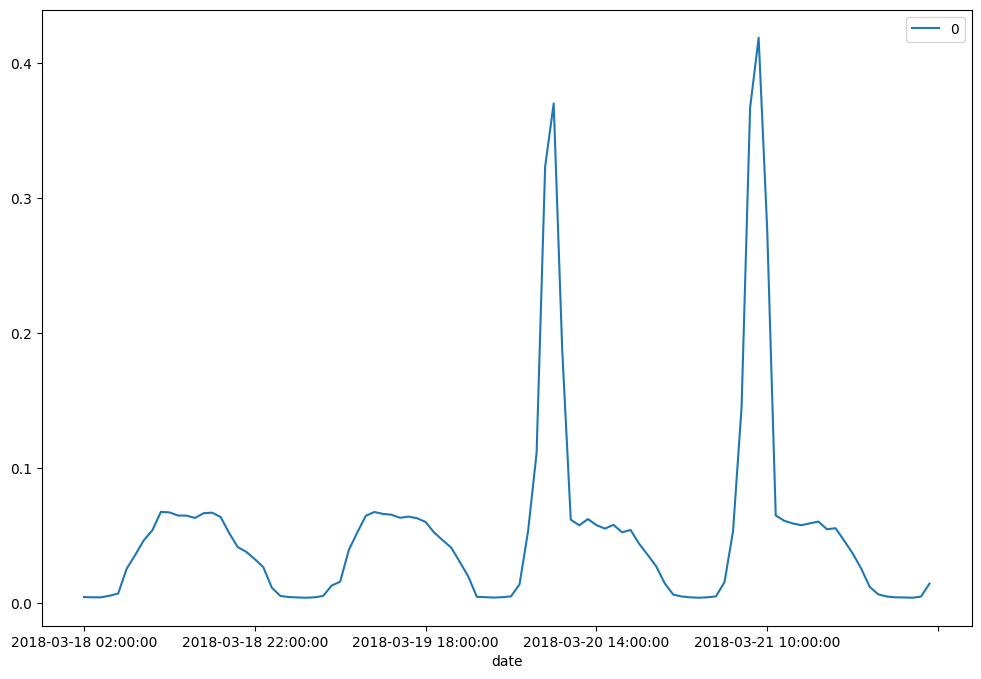

In [55]:
df_ett.iloc[15000:15100, :1].plot()